In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import gaussian_filter

# 4 Shapes

In [3]:
n1, n2 = 1024, 1024
x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1),
                    np.linspace(0.5/n2,1-0.5/n2,n2))
mu1,mu2,mu3,mu4 = np.zeros((n2,n1)), np.zeros((n2,n1)), np.zeros((n2,n1)), np.zeros((n2,n1))
mask1 = (((x-0.3)**2+(y-0.3)**2)<0.15**2) | (((x-0.7)**2+(y-0.7)**2)<0.15**2)
mu1[mask1] = 1
mu1 = gaussian_filter(mu1, sigma=50)
mu1[~mask1] = 0
mu1 *= n1*n2/np.sum(mu1)

mask2 = (1*(x-0.5)**2-(0.4-(y-0.5))**3*(0.4+(y-0.5)) < 0)
mu2[mask2] = 1
mu2 = gaussian_filter(mu2, sigma=50)
mu2[~mask2] = 0
mu2 *= n1*n2/np.sum(mu2)

mask3 = ((x-0.5)**2+(y-0.5)**2>0.2**2)&((x-0.5)**2+(y-0.5)**2<0.4**2)
mu3[mask3] = 1
mu3 = gaussian_filter(mu3, sigma=50)
mu3[~mask3] = 0
mu3 *= n1*n2/np.sum(mu3)

r,p = 0.35, 0.4                    
theta = np.arctan2(y - 0.5, x - 0.5)
r_grid = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
mu4[r_grid < r * np.abs(np.cos(2 * (theta - np.pi / 4)))**p] = 1
mu4 = gaussian_filter(mu4, sigma=50)
mu4[~(r_grid < r * np.abs(np.cos(2 * (theta - np.pi / 4)))**p)] = 0
mu4 *= n1*n2/np.sum(mu4)

mu = [mu1,mu2,mu3,mu4]



## SGA

## Constant Stepsize

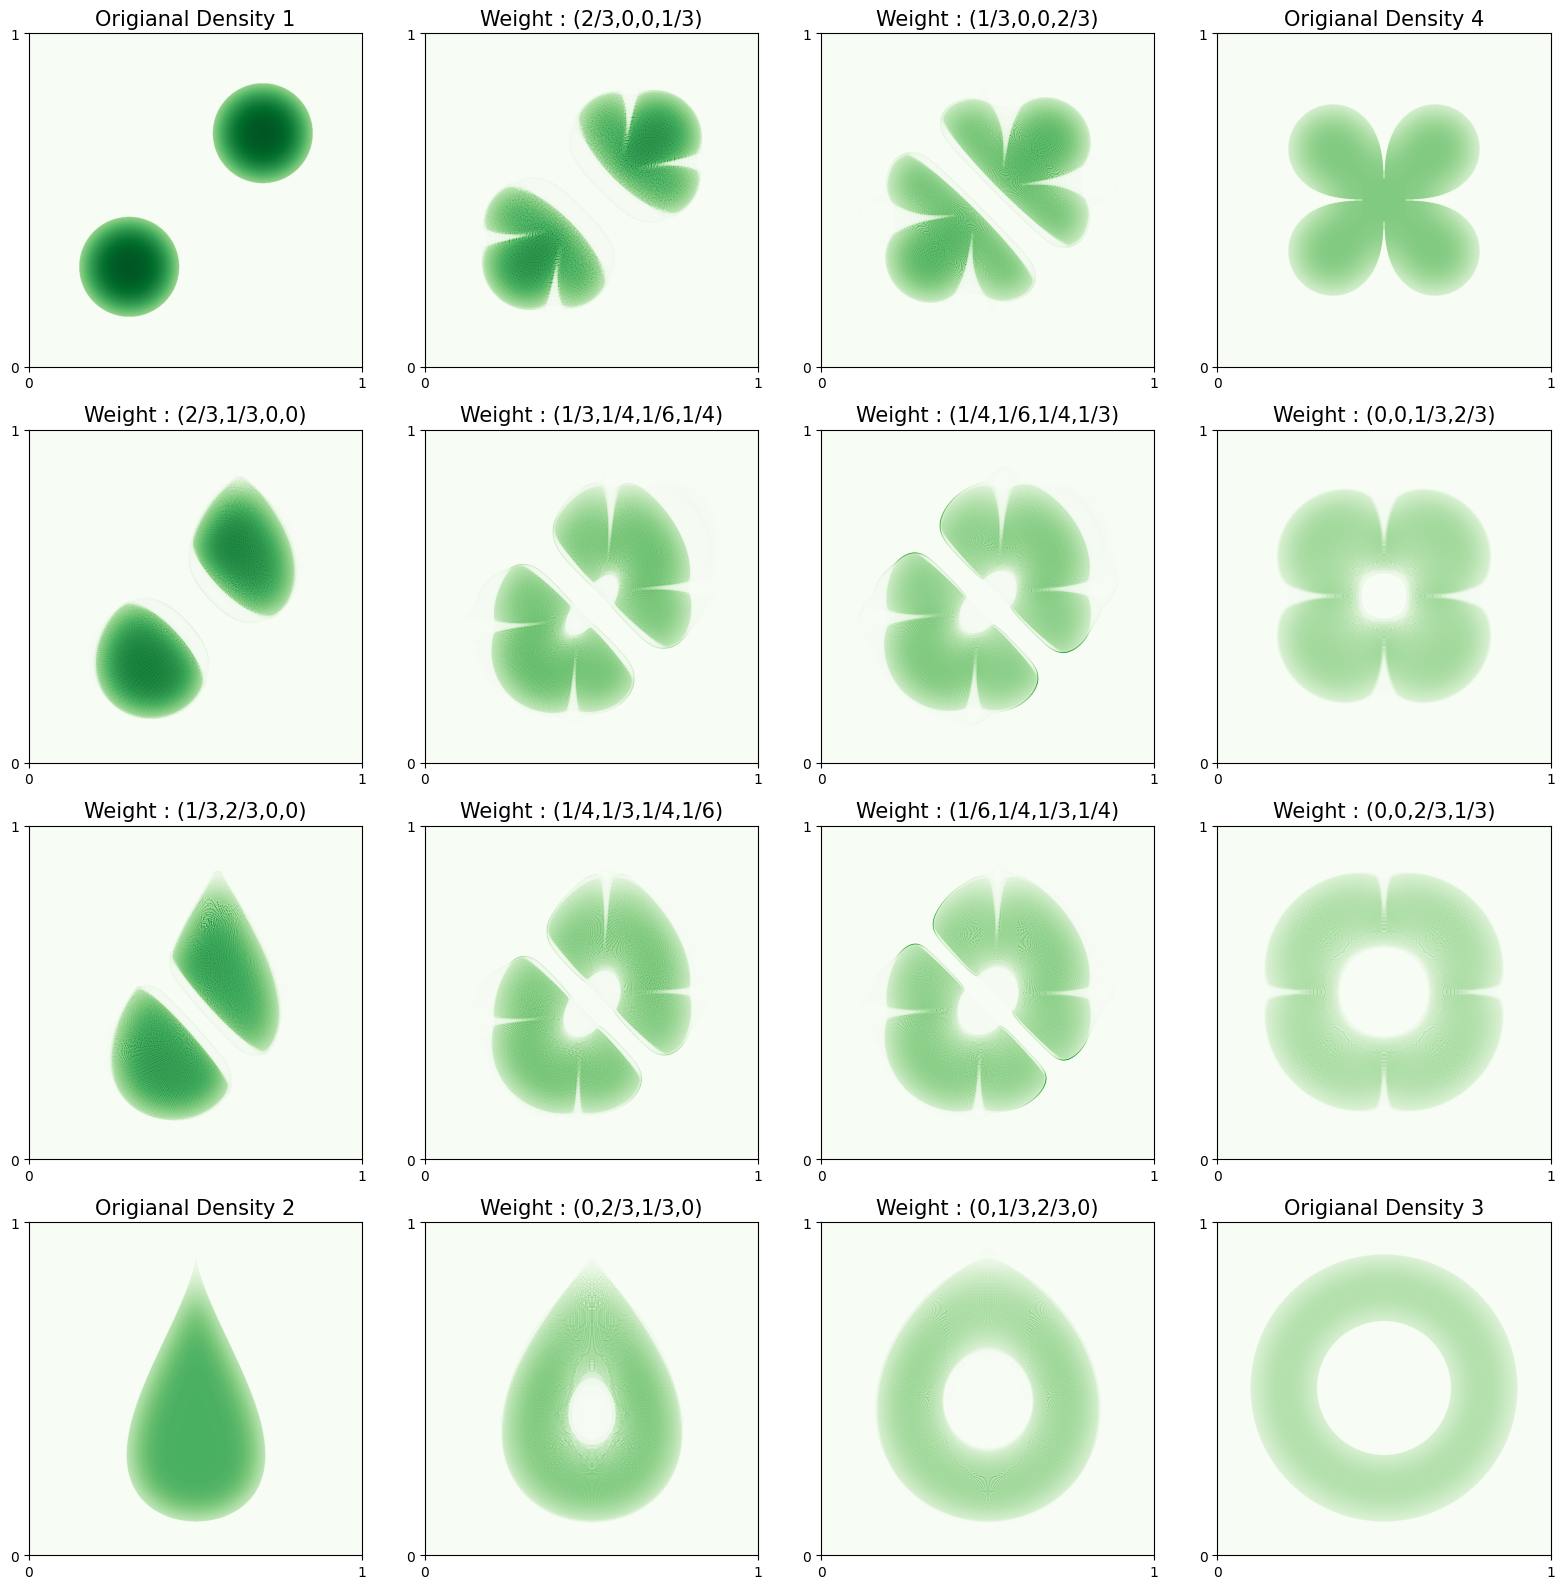

In [ ]:
def plotting_grid(dists, titles=None, vmin=0, vmax=10):


    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    axs = axs.flatten()

    for i, dist in enumerate(dists):
        ax = axs[i]
        ax.imshow(dist, origin='lower', extent=[0, 1, 0, 1], vmin = vmin, vmax = vmax, cmap = 'Greens')
        
        if titles:
            ax.set_title(titles[i], fontsize=15)
        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['0', '1'])
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['0', '1'])

            
    # Hide any unused subplots if fewer than 16
    for j in range(len(dists), 16):
        axs[j].axis('off')
        
        
    plt.tight_layout()
    plt.show()

title = ['Origianal Density 1', 'Weight : (2/3,0,0,1/3)', 'Weight : (1/3,0,0,2/3)', 'Origianal Density 4', 'Weight : (2/3,1/3,0,0)', 
         'Weight : (1/3,1/4,1/6,1/4)', 'Weight : (1/4,1/6,1/4,1/3)',
          'Weight : (0,0,1/3,2/3)','Weight : (1/3,2/3,0,0)', 'Weight : (1/4,1/3,1/4,1/6)', 'Weight : (1/6,1/4,1/3,1/4)', 'Weight : (0,0,2/3,1/3)','Origianal Density 2',
          'Weight : (0,2/3,1/3,0)', 'Weight : (0,1/3,2/3,0)', 'Origianal Density 3']
weights = [[2/3, 0, 0, 1/3], [1/3, 0,0,2/3], 
           [2/3,1/3,0,0], [1/3,1/4,1/6,1/4], [1/4,1/6,1/4,1/3], [0,0,1/3,2/3],
           [1/3,2/3,0,0], [1/4,1/3,1/4,1/6], [1/6,1/4,1/3,1/4], [0,0,2/3,1/3],
           [0,2/3,1/3,0], [0,1/3,2/3,0]]
dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/SGA01/weight1/parallel/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/SGA01/weight2/parallel/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/SGA01/weight{i+1}/sequential/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/SGA01/weight11/parallel/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/SGA01/weight12/parallel/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)

## Decreasing step size

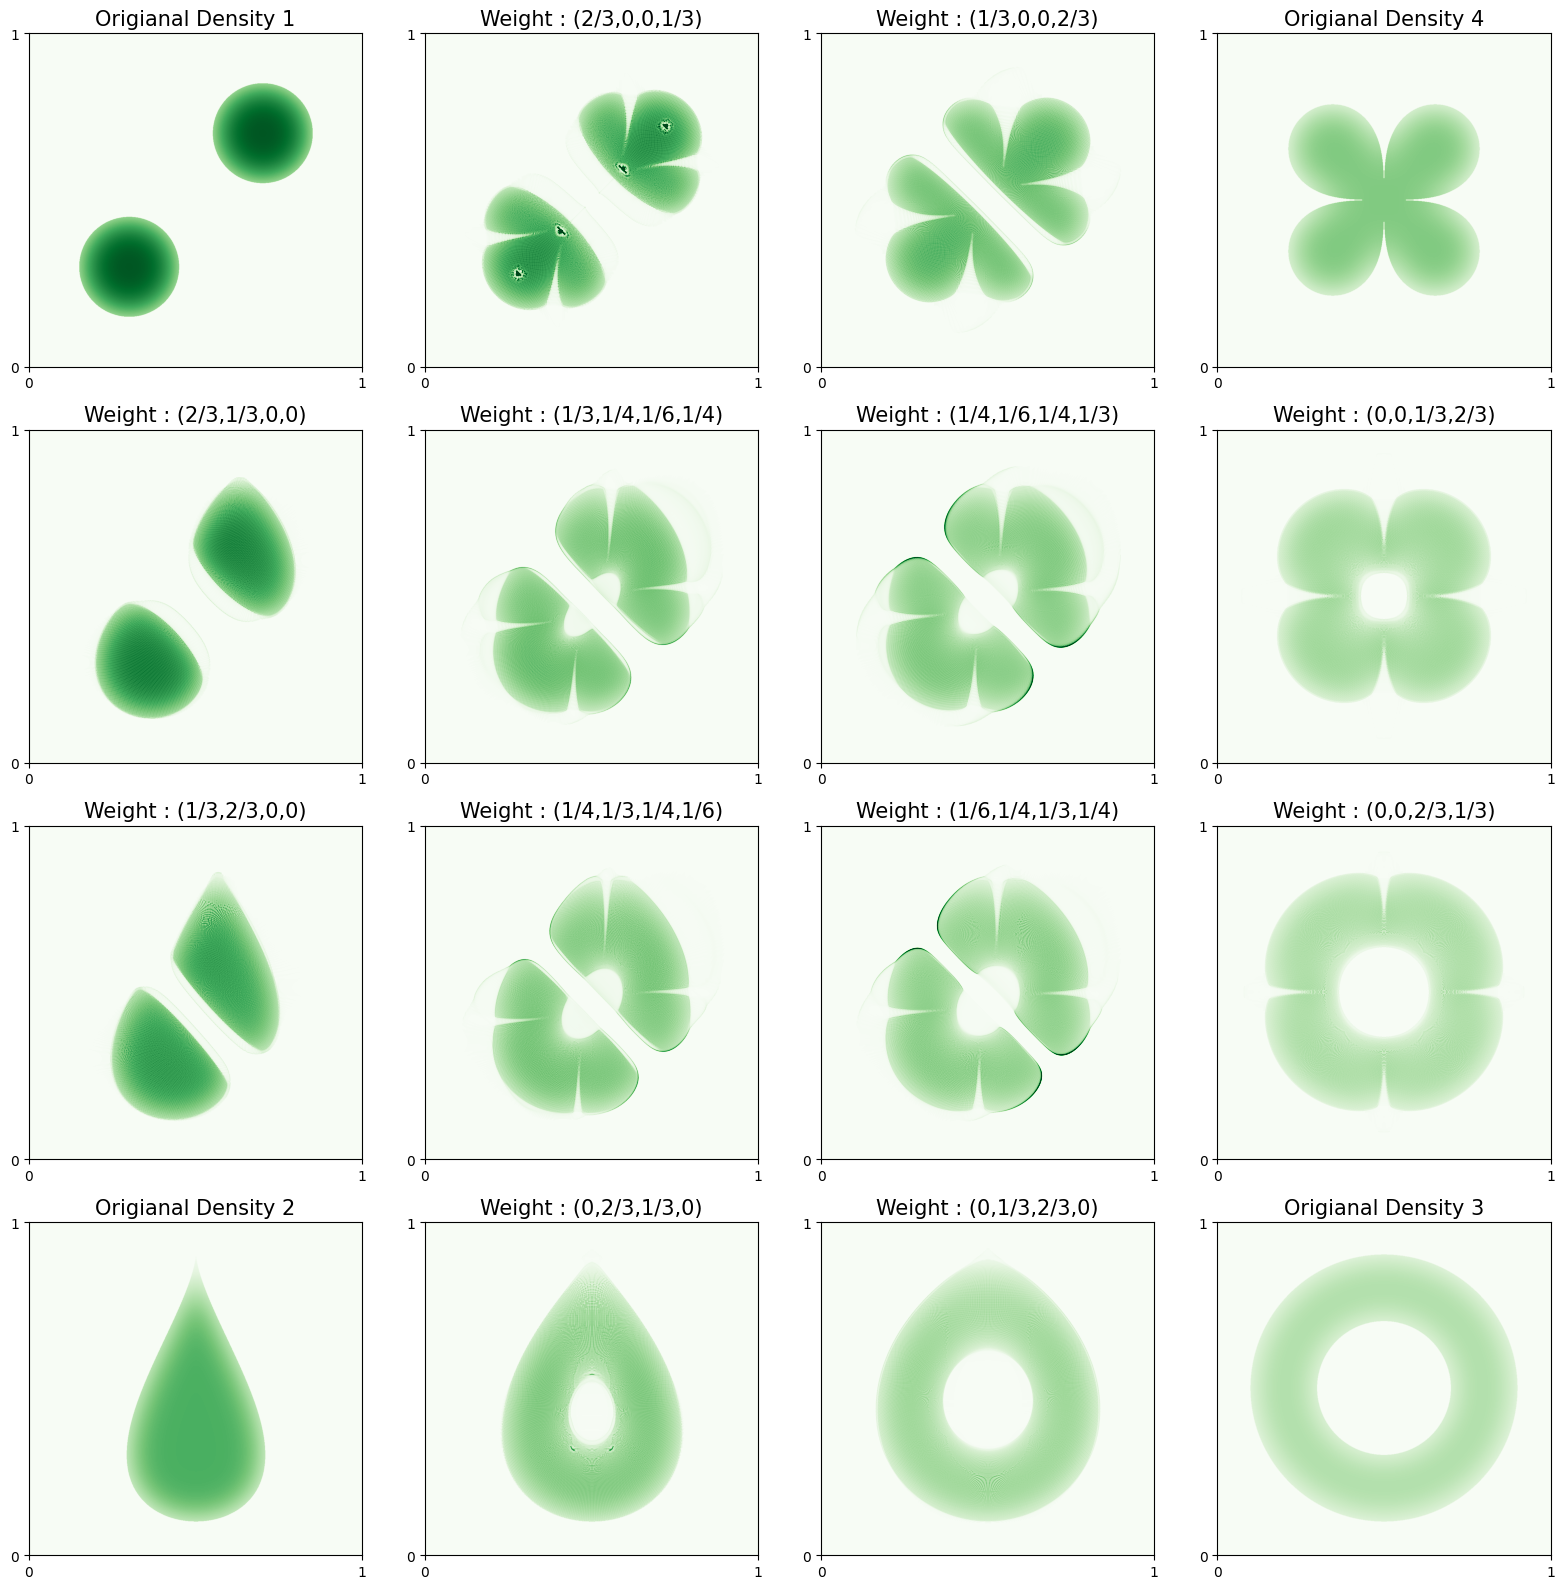

In [ ]:

dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight1/parallel/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight2/parallel/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight{i+1}/sequential/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight11/parallel/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight12/parallel/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)

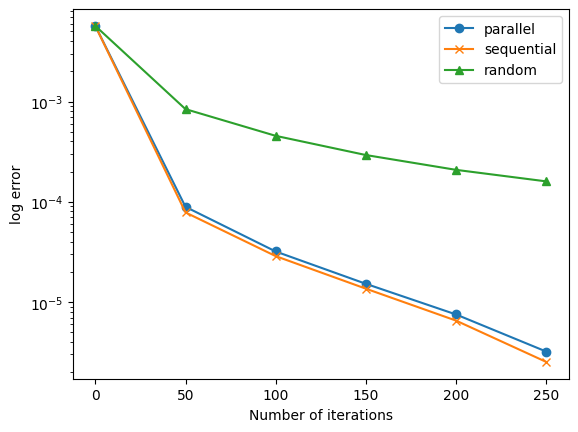

In [ ]:
error_parallel = np.load("/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight_equal/parallel/error.npy")
error_sequential = np.load("/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight_equal/sequential/error.npy")
error_random = np.load("/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/sga05_sqrt/weight_equal/random/error.npy")
optimal = np.max([np.max(error_parallel), np.max(error_sequential), np.max(error_random)])

plt.plot((optimal-error_parallel)[::150][:-1],'-o', label = 'parallel')
plt.plot((optimal-error_sequential)[::150][:-1],'-x', label = 'sequential')
plt.plot((optimal-error_random)[::50][:-1],'-^', label = 'random')
plt.yscale('log')
plt.legend()
plt.xticks(ticks= range(6), labels=[0, 50, 100, 150, 200, 250])
plt.xlabel('Number of iterations')
plt.ylabel('log error')
plt.show()

## WDHA

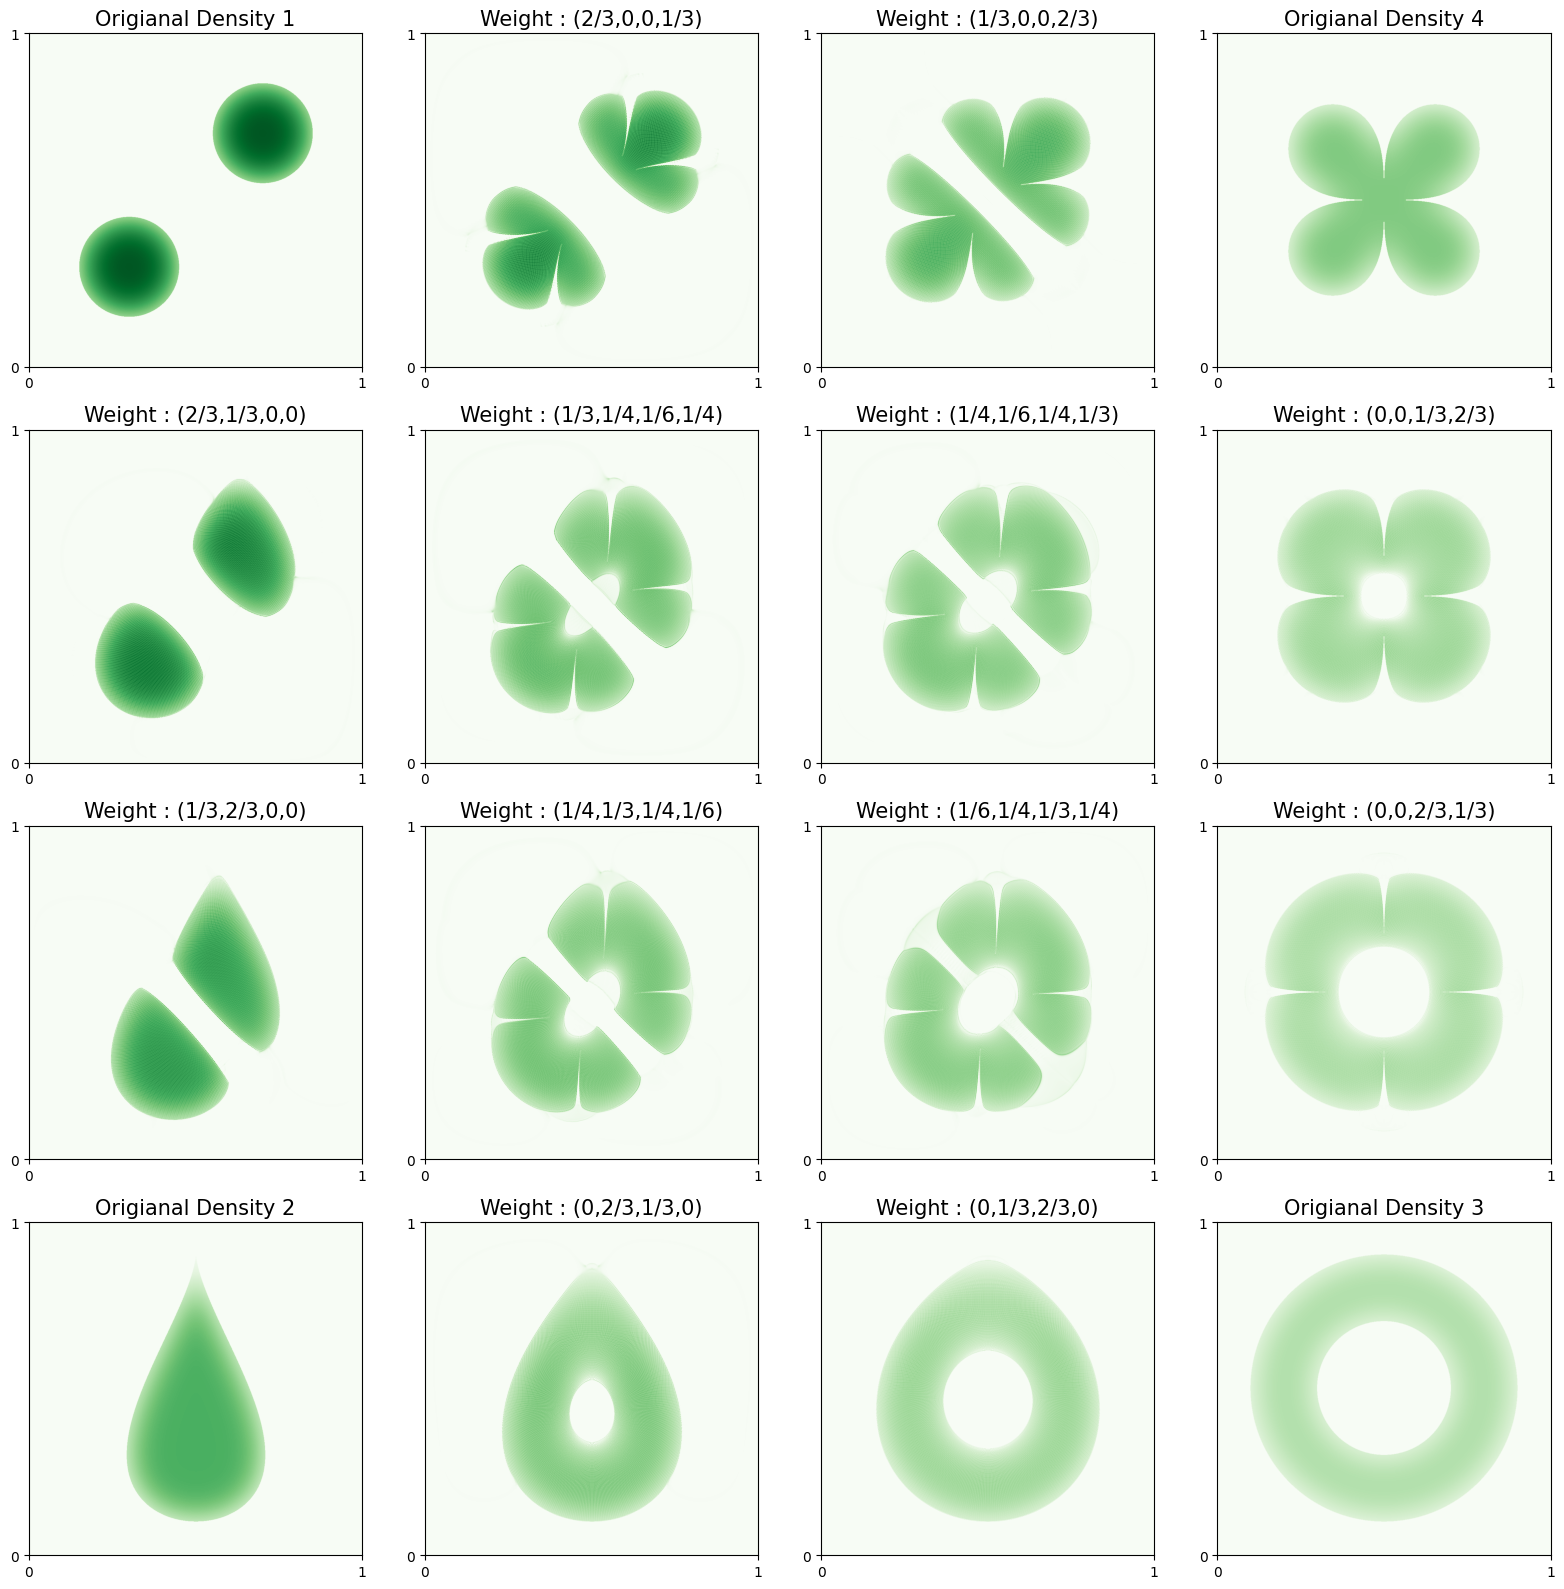

In [ ]:
dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA1e-1_constant/weight1/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA1e-1_constant/weight2/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA1e-1_constant/weight{i+1}/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA1e-1_constant/weight11/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA1e-1_constant/weight12/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)

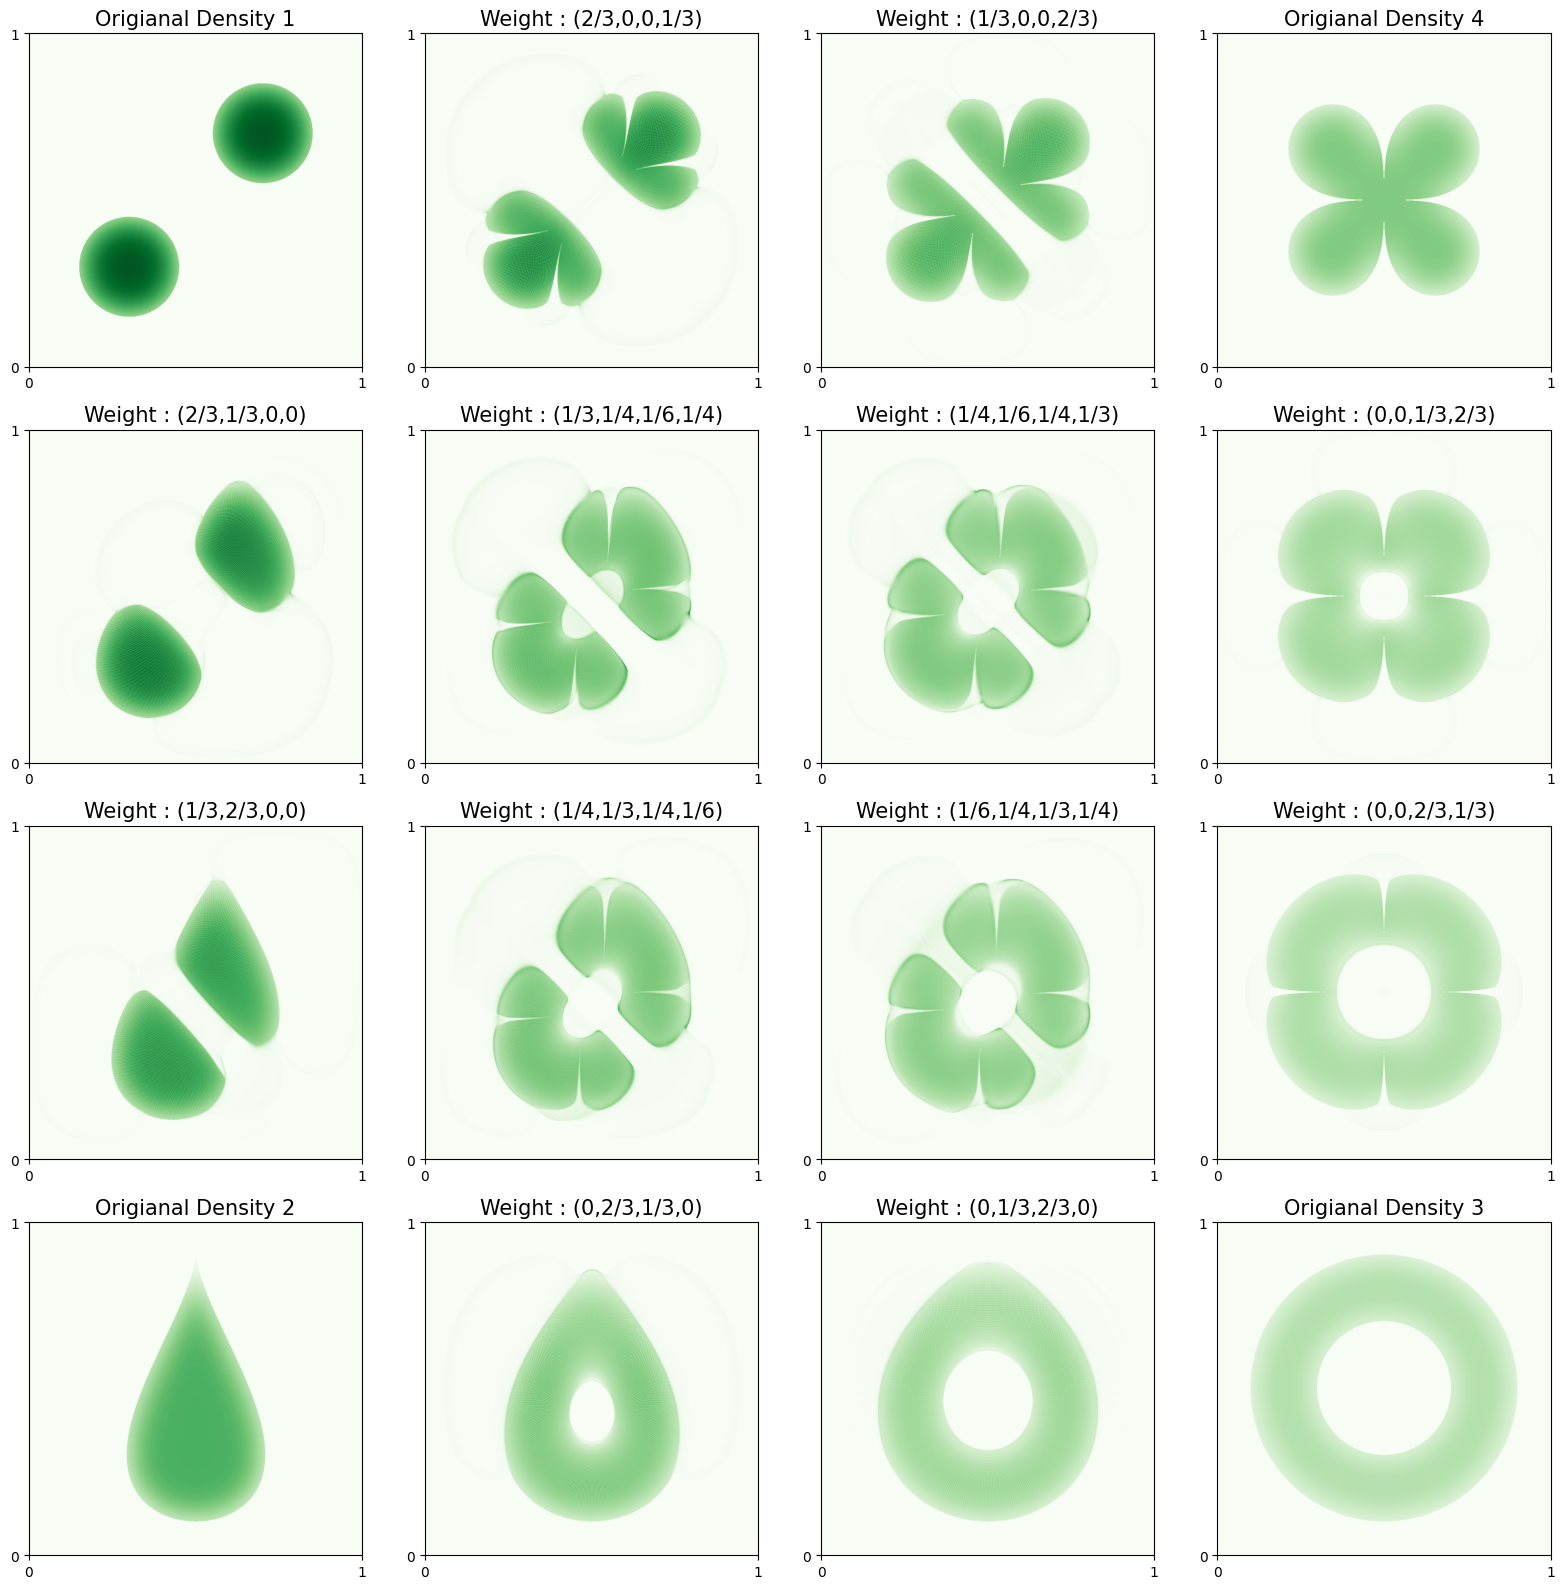

In [ ]:
dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA05/weight1/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA05/weight2/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA05/weight{i+1}/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA05/weight11/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/WDHA05/weight12/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)

## CWB

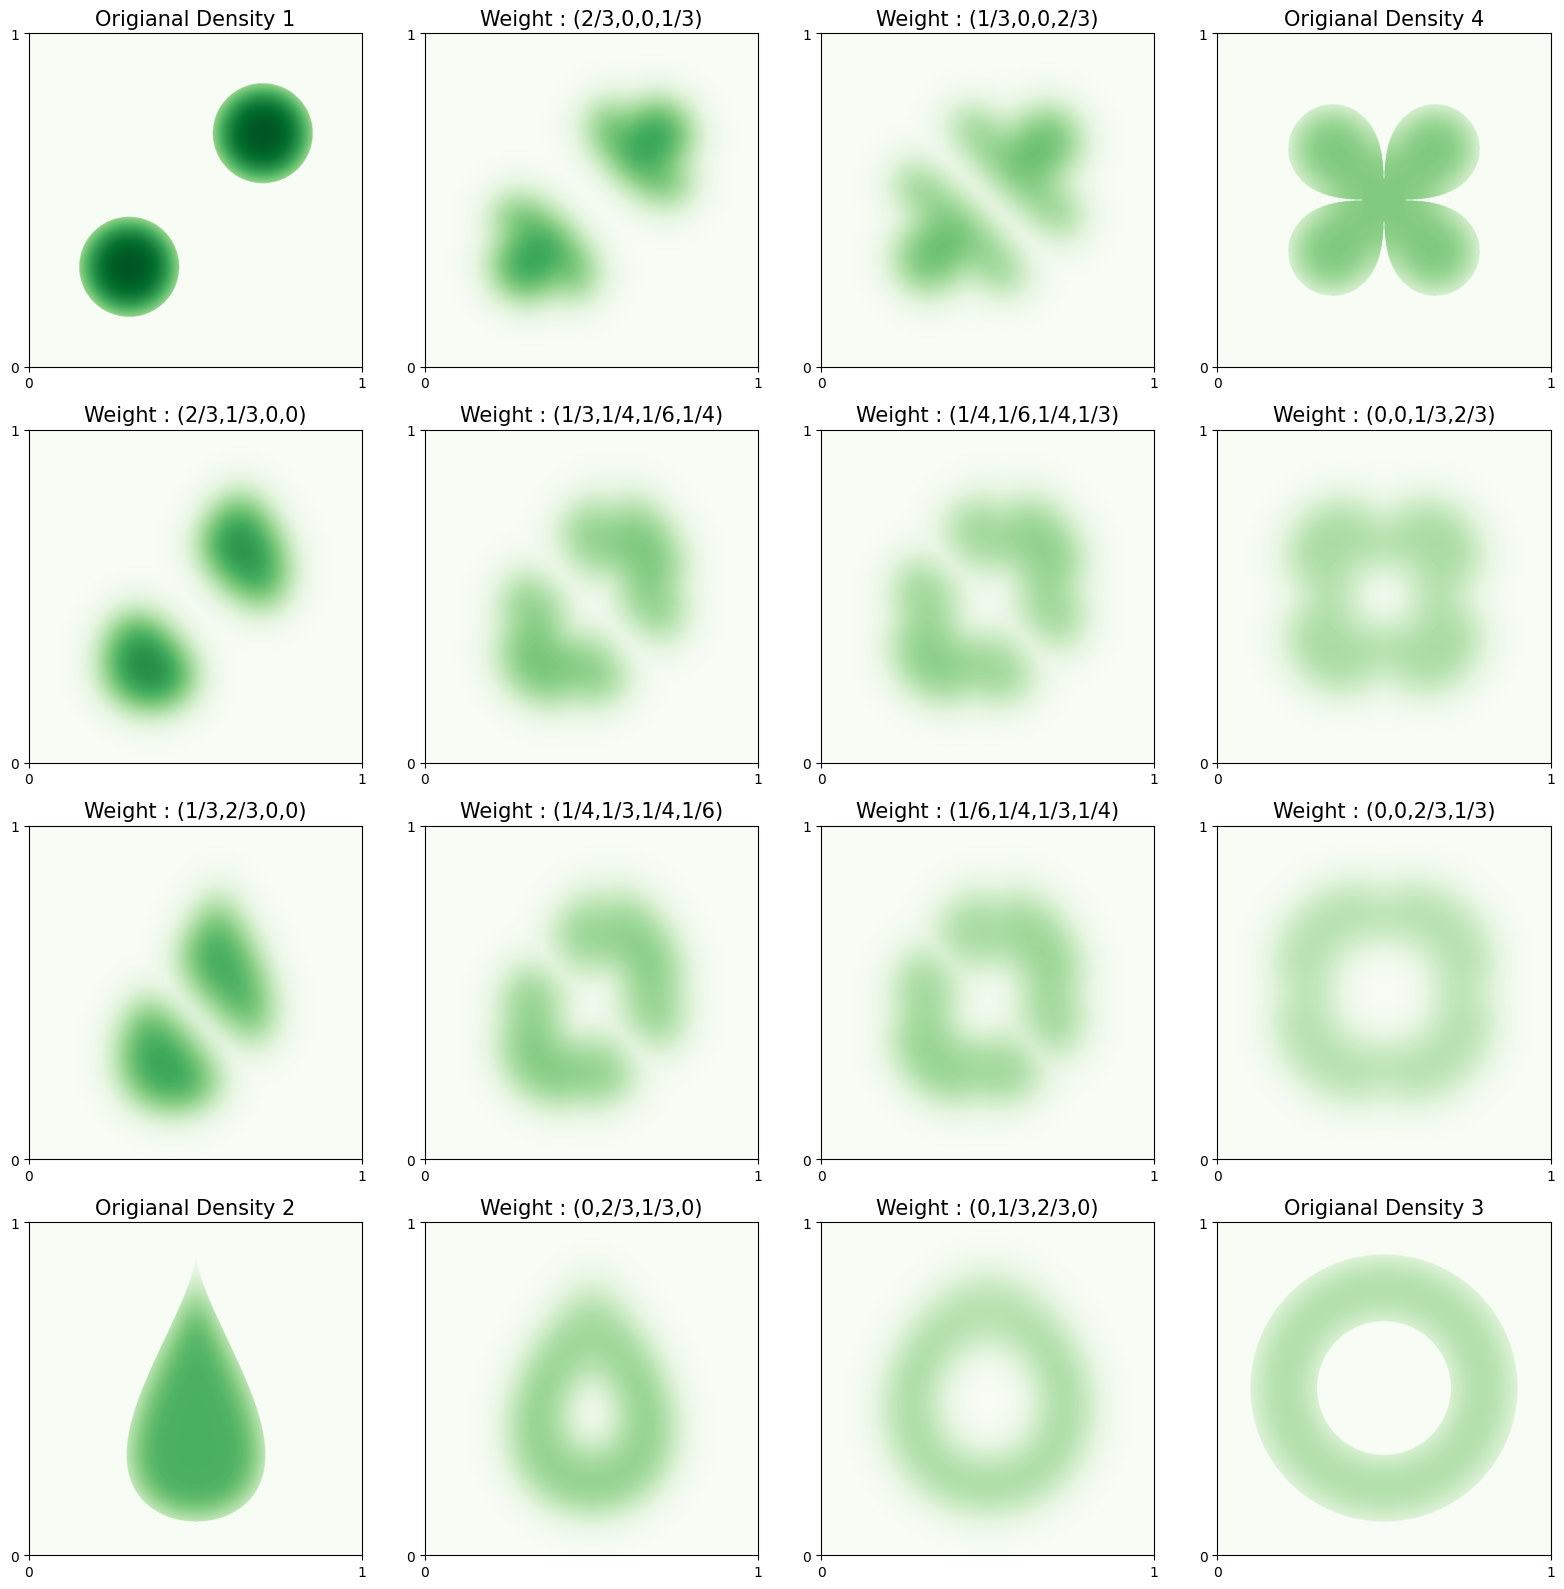

In [ ]:
dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/cwb5e-3/weight1/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/cwb5e-3//weight2/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/cwb5e-3/weight{i+1}/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/cwb5e-3//weight11/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/cwb5e-3/weight12/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)

## DSB

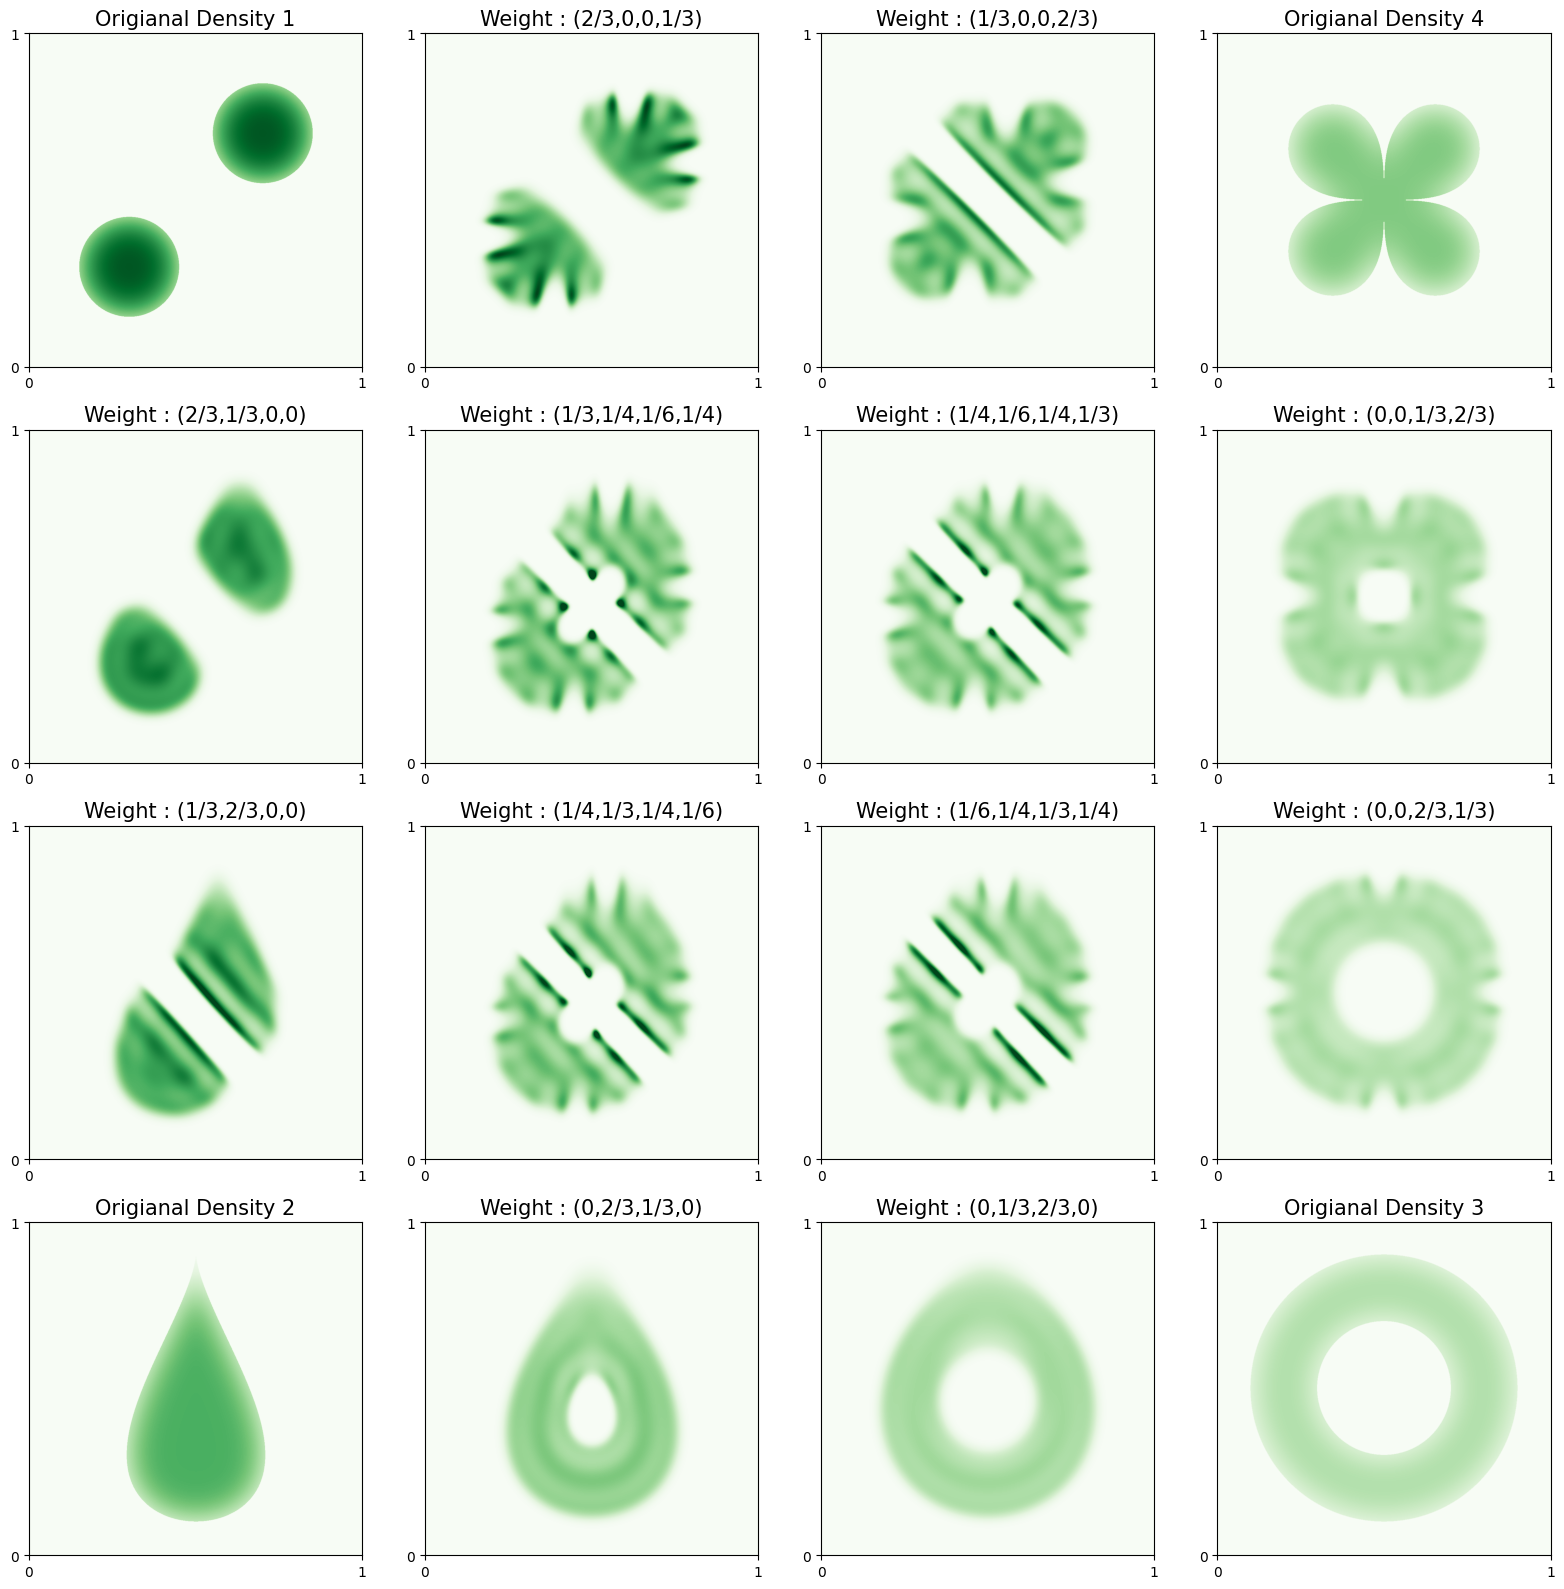

In [ ]:
dists = [
    mu[0],
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/dsb5e-3/weight1/result.npy'),
    np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/dsb5e-3//weight2/result.npy'),
    mu[3]
]

for i in range(2, 10):
    dists.append(np.load(f'/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/dsb5e-3/weight{i+1}/result.npy'))

dists.append(mu[1])
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/dsb5e-3//weight11/result.npy'))
dists.append(np.load('/Users/anonymous/Documents/Recent/SGA/Case2D/image/experiment1/1024/dsb5e-3/weight12/result.npy'))
dists.append(mu[2])

plotting_grid(dists, titles = title)